In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps    

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import scipy.fftpack
import math

In [2]:
road_pitch = np.load('/home/student/Desktop/Stage ENSTA/road values/pitch_velocity_values road.npy')
road_rol = np.load('/home/student/Desktop/Stage ENSTA/road values/roll_velocity_values road.npy')
road_vertical = np.load('/home/student/Desktop/Stage ENSTA/road values/vertical_acceleration_values road.npy')

In [3]:
len(road_pitch)

5414

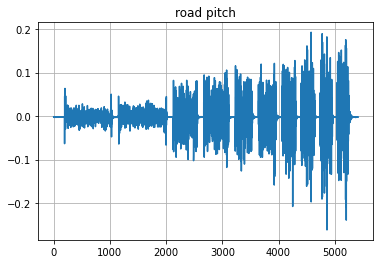

In [4]:
x = np.linspace(0,5414, 5414)
plt.plot(x, road_pitch)
plt.title(f"road pitch")
plt.grid()

In [5]:
#On fixe le terrain : route
#On decoupe en 500 plus petites périodes 

road_pitch_copy_2 = road_pitch
liste_sub_pitch = []
liste_vitesses = [0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,1.0]
print(len(liste_vitesses))
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

road_pitch_copy_2 = road_pitch
rp11 = road_pitch_copy_2[200:1000]
a, b = split_list(rp11)

liste_sub_pitch.append(a)
liste_sub_pitch.append(b)

rp12 = road_pitch_copy_2[1050:2000]
c,d = split_list(rp12)

liste_sub_pitch.append(c)
liste_sub_pitch.append(d)

rp21 = road_pitch_copy_2[2050:2500]
e,f = split_list(rp21)

liste_sub_pitch.append(e)
liste_sub_pitch.append(f)

rp22 = road_pitch_copy_2[2600:3050]
h,i = split_list(rp22)

liste_sub_pitch.append(h)
liste_sub_pitch.append(i)

rp31 = road_pitch_copy_2[3100:3550]
j,k = split_list(rp31)

liste_sub_pitch.append(j)
liste_sub_pitch.append(k)

rp32 = road_pitch_copy_2[3600:3950]
l,m = split_list(rp31)

liste_sub_pitch.append(l)
liste_sub_pitch.append(m)

rp41 = road_pitch_copy_2[4000:4300]
n,o = split_list(rp41)

liste_sub_pitch.append(n)
liste_sub_pitch.append(o)

rp42 = road_pitch_copy_2[4300:4600]
q,r = split_list(rp42)

liste_sub_pitch.append(q)
liste_sub_pitch.append(r)

rp51 = road_pitch_copy_2[4650:5000]
s,t = split_list(rp51)

liste_sub_pitch.append(s)
liste_sub_pitch.append(t)

rp52 = road_pitch_copy_2[5000:5300]
u,v = split_list(rp52)

liste_sub_pitch.append(u)
liste_sub_pitch.append(v)



print(len(liste_sub_pitch))



21
20


Text(0.5, 1.0, 'road roll')

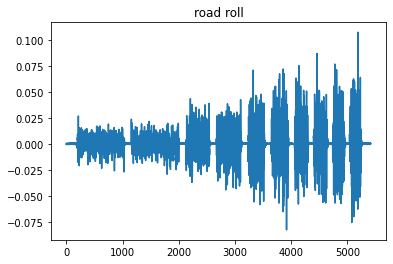

In [6]:
plt.plot(x, road_rol)
plt.title(f"road roll")

In [7]:
road_roll_copy_2 = road_rol
liste_sub_roll = []

rp11 = road_roll_copy_2[200:1000]
a, b = split_list(rp11)

liste_sub_roll.append(a)
liste_sub_roll.append(b)

rp12 = road_roll_copy_2[1050:2000]
c,d = split_list(rp12)

liste_sub_roll.append(c)
liste_sub_roll.append(d)

rp21 = road_roll_copy_2[2050:2500]
e,f = split_list(rp21)

liste_sub_roll.append(e)
liste_sub_roll.append(f)

rp22 = road_roll_copy_2[2600:3050]
h,i = split_list(rp22)

liste_sub_roll.append(h)
liste_sub_roll.append(i)

rp31 = road_roll_copy_2[3100:3550]
j,k = split_list(rp31)

liste_sub_roll.append(j)
liste_sub_roll.append(k)

rp32 = road_roll_copy_2[3600:3950]
l,m = split_list(rp31)

liste_sub_roll.append(l)
liste_sub_roll.append(m)

rp41 = road_roll_copy_2[4000:4300]
n,o = split_list(rp41)

liste_sub_roll.append(n)
liste_sub_roll.append(o)

rp42 = road_roll_copy_2[4300:4600]
q,r = split_list(rp42)

liste_sub_roll.append(q)
liste_sub_roll.append(r)

rp51 = road_roll_copy_2[4650:5000]
s,t = split_list(rp51)

liste_sub_roll.append(s)
liste_sub_roll.append(t)

rp52 = road_roll_copy_2[5000:5300]
u,v = split_list(rp52)

liste_sub_roll.append(u)
liste_sub_roll.append(v)

print(len(liste_sub_roll))

20


Text(0.5, 1.0, 'road vertical acceleration')

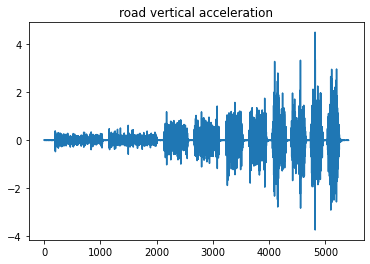

In [8]:
plt.plot(x, road_vertical)
plt.title(f"road vertical acceleration")

In [9]:
road_vertical_copy_2 = road_vertical
liste_sub_vertical = []

rp11 = road_vertical_copy_2[200:1000]
a, b = split_list(rp11)

liste_sub_vertical.append(a)
liste_sub_vertical.append(b)

rp12 = road_vertical_copy_2[1050:2000]
c,d = split_list(rp12)

liste_sub_vertical.append(c)
liste_sub_vertical.append(d)

rp21 = road_vertical_copy_2[2050:2500]
e,f = split_list(rp21)

liste_sub_vertical.append(e)
liste_sub_vertical.append(f)

rp22 = road_vertical_copy_2[2600:3050]
h,i = split_list(rp22)

liste_sub_vertical.append(h)
liste_sub_vertical.append(i)

rp31 = road_vertical_copy_2[3100:3550]
j,k = split_list(rp31)

liste_sub_vertical.append(j)
liste_sub_vertical.append(k)

rp32 = road_vertical_copy_2[3600:3950]
l,m = split_list(rp31)

liste_sub_vertical.append(l)
liste_sub_vertical.append(m)

rp41 = road_vertical_copy_2[4000:4300]
n,o = split_list(rp41)

liste_sub_vertical.append(n)
liste_sub_vertical.append(o)

rp42 = road_vertical_copy_2[4300:4600]
q,r = split_list(rp42)

liste_sub_vertical.append(q)
liste_sub_vertical.append(r)

rp51 = road_vertical_copy_2[4650:5000]
s,t = split_list(rp51)

liste_sub_vertical.append(s)
liste_sub_vertical.append(t)

rp52 = road_vertical_copy_2[5000:5300]
u,v = split_list(rp52)

liste_sub_vertical.append(u)
liste_sub_vertical.append(v)


print(len(liste_sub_vertical))

20


In [10]:
#On decoupe en 2 les données reste à creer un vecteur avec la variance de chaque valeurs et de stocker 
#cette valeur dans un vecteur de 3 coordonnées.

Liste_variance =  []
Liste_sans_variance = []
n = len(liste_sub_vertical)
#print(n)

for i in range(n):
    
    var_rp = np.std(liste_sub_pitch[i])
    var_rr = np.std(liste_sub_roll[i])
    var_rv = np.std(liste_sub_vertical[i])
    
    var = [var_rp, var_rr, var_rv]
    #var = np.array((var_rp, var_rr, var_rv))
    
    vitesse = liste_vitesses[i]
    Liste_variance.append((var, vitesse))
    print((var, vitesse))
    
# Velocities: 0.2 - 0.4 - 0.6 - 0.8 - 1.0 m/s

print(len(Liste_variance))
        

([0.012857137800877253, 0.007800780364136756, 0.1241414759769913], 0.2)
([0.009968403869565143, 0.007558461054512192, 0.11358098498278628], 0.2)
([0.012221547426244745, 0.00707853977050738, 0.12852914183845096], 0.2)
([0.012822737884080082, 0.008555177660879711, 0.12380913987543586], 0.2)
([0.028301075884405284, 0.012845449793773403, 0.2759113477909081], 0.4)
([0.03379074271597068, 0.013364658280301188, 0.3641740813062387], 0.4)
([0.033231326342547225, 0.011811819531648643, 0.332696916281976], 0.4)
([0.03766337559081406, 0.017654097647746236, 0.3648638433135025], 0.4)
([0.034467575630401925, 0.014340133230111123, 0.3864304083461069], 0.6)
([0.04026170726038545, 0.021539670976098838, 0.542313282653973], 0.6)
([0.034467575630401925, 0.014340133230111123, 0.3864304083461069], 0.6)
([0.04026170726038545, 0.021539670976098838, 0.542313282653973], 0.6)
([0.04535472635028817, 0.019781249188135563, 0.8349376304769464], 0.8)
([0.057001512606103845, 0.02181536537767014, 0.8229369078343687], 0.8)

In [11]:
class Tri_data_1(Dataset):
    
    def __init__(self, data):
        
        self.data = data
        
    def __len__(self):
        return len(self.data)
        
   # def tri(self, data):
    def __getitem__(self):
        
        Triplet_list = []
        
        for i in range(100):
            
            a, b, c = random.sample(self.data, 3) #mettre ca dans le init
            Liste_A_P_N = sorted((a,b,c), key = lambda x: x[-1])
            Triplet_list.append((Liste_A_P_N[0][0], Liste_A_P_N[1][0], Liste_A_P_N[-1][0]))
            
        return Triplet_list
    #return self.data[idx]
            

In [26]:
class Tri_data_2(Dataset):
    
    def __init__(self, data, size_list):
        
        self.data = data
        self.size_list = size_list
        Triplet_list = []
        
        for i in range(size_list):
            
            a, b, c = random.sample(self.data, 3) 
            Liste_A_P_N = sorted((a,b,c), key = lambda x: x[-1])
            Triplet_list.append(torch.tensor((Liste_A_P_N[0][0], Liste_A_P_N[1][0], Liste_A_P_N[-1][0]), dtype=torch.float))
        
        self.data = Triplet_list
        
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
            
        return self.data[idx]


In [13]:
test = Tri_data_2(Liste_variance, 100)

print(len(test))

for triplet in test :
    #print(triplet)
    #print(len(triplet[0]))
    
    break

100


In [29]:
test2 = DataLoader(test, shuffle = True, )

for triplet in test2 :
    print(triplet.shape)
    print(triplet)
    print(triplet[0])
    print(triplet[0][0])
    
    break

torch.Size([1, 3, 3])
tensor([[[0.0338, 0.0134, 0.3642],
         [0.0638, 0.0233, 0.9523],
         [0.0575, 0.0239, 0.9648]]])
tensor([[0.0338, 0.0134, 0.3642],
        [0.0638, 0.0233, 0.9523],
        [0.0575, 0.0239, 0.9648]])
tensor([0.0338, 0.0134, 0.3642])


In [15]:
def Tri_sample(data):
    
    Triplet_list = []
 
    for i in range(len(data)):
        
        a, b, c = random.sample(data, 3)
        Liste_A_P_N = sorted((a,b,c), key = lambda x: x[-1])
        Triplet_list.append(torch.tensor((Liste_A_P_N[0][0], Liste_A_P_N[1][0], Liste_A_P_N[-1][0]), dtype=torch.float))
        #Triplet_list.append((Liste_A_P_N[0][0], Liste_A_P_N[1][0], Liste_A_P_N[-1][0]))
        
        
    return Triplet_list

test = Tri_sample(Liste_variance)
print(len(test))

print(test)
    

20
[tensor([[0.0338, 0.0134, 0.3642],
        [0.0366, 0.0121, 0.3979],
        [0.0575, 0.0239, 0.9648]]), tensor([[0.0338, 0.0134, 0.3642],
        [0.0345, 0.0143, 0.3864],
        [0.0638, 0.0233, 0.9523]]), tensor([[0.0338, 0.0134, 0.3642],
        [0.0345, 0.0143, 0.3864],
        [0.0454, 0.0198, 0.8349]]), tensor([[0.0122, 0.0071, 0.1285],
        [0.0403, 0.0215, 0.5423],
        [0.0570, 0.0218, 0.8229]]), tensor([[0.0283, 0.0128, 0.2759],
        [0.0338, 0.0134, 0.3642],
        [0.0403, 0.0215, 0.5423]]), tensor([[0.0128, 0.0086, 0.1238],
        [0.0570, 0.0218, 0.8229],
        [0.0553, 0.0189, 0.9765]]), tensor([[0.0283, 0.0128, 0.2759],
        [0.0454, 0.0198, 0.8349],
        [0.0366, 0.0121, 0.3979]]), tensor([[0.0129, 0.0078, 0.1241],
        [0.0332, 0.0118, 0.3327],
        [0.0366, 0.0121, 0.3979]]), tensor([[0.0338, 0.0134, 0.3642],
        [0.0570, 0.0218, 0.8229],
        [0.0638, 0.0233, 0.9523]]), tensor([[0.0129, 0.0078, 0.1241],
        [0.0338, 0.0134, 0

In [16]:
class SiameseNetwork(nn.Module):

    def __init__(self):
        super(SiameseNetwork, self).__init__()
        #conv de 1 dim
        #tracer sur le plan 
        #transfomée de fourirer
        #spectrogramme
        
        # Setting up the Fully Connected Layers
        self.fc1 = nn.Sequential(
            nn.Linear(3, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 50),
            nn.ReLU(inplace=True),
            nn.Linear(50, 25),
            nn.ReLU(inplace=True),
            nn.Linear(25, 10),
            nn.ReLU(inplace=True),
            nn.Linear(10, 1),
            )
        
    def forward_once(self, x):
        # This function will be called for both images
        # Its output is used to determine the similiarity
        output = self.fc1(x)
        return output

    def forward(self, input1):

        output1 = self.forward_once(input1) #1er argument : la variance, 2e argument = la vitesse
        
        return output1

In [17]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, A, P, N, alpha):
        
      loss_contrastive = max(torch.norm(A - P)**(2) - torch.norm(A-N)**(2) + alpha, 0)


      return loss_contrastive

In [18]:
class ListeSTD_Dataset(Dataset):
    
    def __init__(self, data):
    
        self.data = data

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self):
        
        Liste_triee = []
        
        for i in range(20):
            
            a, b, c = random.sample(self.data_list, 3)
            Liste_A_P_N = sorted((a,b,c), key = lambda x: x[-1])
            Liste_triee.append([Liste_A_P_N[0][0], Liste_A_P_N[1][0], Liste_A_P_N[-1][0]])
            
        return Liste_triee

Liste = [triplet1, ...., triplet20]
et tripletn = ((sigma1), (sigma2), sigma(3))

In [19]:
#criterion = ContrastiveLoss()
criterion = nn.TripletMarginLoss(margin=1.0, p=2)
alpha = 0.005
net = SiameseNetwork()
optimizer = optim.SGD(net.parameters(), lr=0.00005, momentum=0.1)
size_batch = 1
triplets = Tri_data_2(Liste_variance, 100)
#Tri_avec_loader = DataLoader(Tri_sample(Liste_variance), shuffle = True, batch_size = 3)

counter = []
loss_history = [] 
iteration_number= 0


for epoch in range(100):
    
    for triplet in triplets:
        
            #print(len(triplet))
            #print(len(triplets))
            #print(triplet)
            
        cost_1 = net(triplet[0])
        cost_2 = net(triplet[1])
        cost_3 = net(triplet[-1])
            
        optimizer.zero_grad()

        loss = criterion(cost_1,cost_2,cost_3)
            
            #rajouter d'autres loss 
            
            #print(loss)
            #loss_history.append(float(loss))
            
    loss.backward()
    optimizer.step()
        
            

In [20]:
Tri_avec_loader = DataLoader(Tri_sample(Liste_variance), shuffle = True, batch_size = 3)
for item in Tri_avec_loader:
    print(item)
    print(item[0][0])
    print(triplet[0][1])
    print(triplet[0][-1])
    break
    for triplet in item:
        print(triplet[0])
        print(triplet[1])
        print(triplet[-1])
        
        #print(triplet[0][0])
    

tensor([[[0.0128, 0.0086, 0.1238],
         [0.0338, 0.0134, 0.3642],
         [0.0553, 0.0189, 0.9765]],

        [[0.0122, 0.0071, 0.1285],
         [0.0403, 0.0215, 0.5423],
         [0.0403, 0.0215, 0.5423]],

        [[0.0129, 0.0078, 0.1241],
         [0.0403, 0.0215, 0.5423],
         [0.0566, 0.0212, 0.7429]]])
tensor([0.0128, 0.0086, 0.1238])
tensor(0.0076)
tensor(0.1136)


In [21]:
test = torch.tensor([5.501, 10.218, 0.8229], dtype=torch.float)
print(net(test))

test = torch.tensor([5.501, 10.218, 25.8229], dtype=torch.float)
print(net(test))

import random

def random_positive_numbers():
    numbers = []
    n = 100
    for _ in range(3):
        number = random.randint(0, n)  # Adjust the range as needed
        number = number/n
        #print(number)
        numbers.append(number)
    return numbers

for i in range(5):
    
    print(random_positive_numbers())
    test = torch.tensor(random_positive_numbers(), dtype=torch.float)
    test2 = torch.tensor([10.4,5.4,0.01], dtype=torch.float)
    
    print(f"noraml = {float(net(test))}")
    print(f"noraml2 = {float(net(test2))}")
    
    print(f"log = {math.log10(abs(np.log(float(net(test)))))}")
    


tensor([0.3544], grad_fn=<AddBackward0>)
tensor([0.4845], grad_fn=<AddBackward0>)
[0.31, 0.22, 0.3]
noraml = 0.23473674058914185
noraml2 = 0.32769137620925903
log = 0.1611554890761229
[0.47, 0.67, 0.79]
noraml = 0.22946256399154663
noraml2 = 0.32769137620925903
log = 0.16791234842873493
[0.94, 0.18, 0.35]
noraml = 0.23298554122447968
noraml2 = 0.32769137620925903
log = 0.1633936371921093
[0.54, 0.76, 0.26]
noraml = 0.23096032440662384
noraml2 = 0.32769137620925903
log = 0.1659885903453895
[0.12, 0.96, 0.4]
noraml = 0.22984838485717773
noraml2 = 0.32769137620925903
log = 0.16741640867734275


In [22]:
for test in Liste_variance:
    test_1 = torch.tensor(test[0], dtype=torch.float)
    
    #print(abs(np.log((float(net(test_1))))))
    print(float(net(test_1)))
    

0.22408655285835266
0.22413203120231628
0.22406816482543945
0.2240947186946869
0.22345668077468872
0.22285600006580353
0.22305861115455627
0.22291754186153412
0.22270995378494263
0.22269253432750702
0.22270995378494263
0.22269253432750702
0.22313205897808075
0.2232608199119568
0.22261354327201843
0.2234240025281906
0.2238103747367859
0.22311565279960632
0.2238701432943344
0.22387921810150146


In [23]:
for test in Liste_variance:
    test = torch.tensor(test[0], dtype=torch.float)
    
    print(np.log((float(net(test)))))
    #print(np.log(float(net(test))))
    

-1.4957229050699992
-1.4955199757594486
-1.495804966162733
-1.4956864651879538
-1.498537705751619
-1.5012294557168713
-1.500320711766358
-1.500953343339921
-1.5018850097816692
-1.5019632287315376
-1.5018850097816692
-1.5019632287315376
-1.4999914900721165
-1.4994145949488464
-1.5023180006975656
-1.4986839561839036
-1.4969561269992113
-1.5000650195403864
-1.4966891126642277
-1.4966485774543503


In [24]:
a = [1,2,3,4,5]
a[-5]

1

In [25]:
Tri_avec_loader = DataLoader(Tri_data_2(Liste_variance, 100)
, shuffle = True, batch_size = 1)

for i, test in enumerate(Tri_avec_loader,0):
    print(test)
    print(test[0])
    break


tensor([[[0.0338, 0.0134, 0.3642],
         [0.0638, 0.0233, 0.9523],
         [0.0575, 0.0239, 0.9648]]])
tensor([[0.0338, 0.0134, 0.3642],
        [0.0638, 0.0233, 0.9523],
        [0.0575, 0.0239, 0.9648]])
